# Data Analysis on HealthCareProvider Quality Dataset

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report


## Problem Statement :
## Build a model that will predict whether a patient had a good care or poor care after visits to a Health Care Provider

## About the Data:

The variables in the dataset quality.csv are as follows:

- __MemberID__ numbers the patients from 1 to 131, and is just an identifying number.
- __InpatientDays__ is the number of inpatient visits, or number of days the person spent in the hospital.
- __ERVisits__ is the number of times the patient visited the emergency room.
- __OfficeVisits__ is the number of times the patient visited any doctor's office.
- __Narcotics__ is the number of prescriptions the patient had for narcotics.
- __DaysSinceLastERVisit__ is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER).
- __Pain__ is the number of visits for which the patient complained about pain.
- __TotalVisits__ is the total number of times the patient visited any healthcare provider.
- __ProviderCount__ is the number of providers that served the patient.
- __MedicalClaims__ is the number of days on which the patient had a medical claim.
- __ClaimLines__ is the total number of medical claims.
- __StartedOnCombination__ is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
- __AcuteDrugGapSmall__ is the fraction of acute drugs that were refilled quickly after the prescription ran out.
- __PoorCare__ is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

### Load Data and read the data as a data frame

In [2]:
df = pd.read_csv("quality.csv")

### Shape of the data

In [3]:
df.shape

(131, 14)

### Data type of each attribute

In [4]:
df.dtypes

MemberID                  int64
InpatientDays             int64
ERVisits                  int64
OfficeVisits              int64
Narcotics                 int64
DaysSinceLastERVisit    float64
Pain                      int64
TotalVisits               int64
ProviderCount             int64
MedicalClaims             int64
ClaimLines                int64
StartedOnCombination       bool
AcuteDrugGapSmall         int64
PoorCare                  int64
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
df.head(5)

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [6]:
df.tail(5)

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
126,127,1,1,5,3,444.000000,0,7,11,11,36,False,0,0
127,128,1,0,3,2,731.000000,0,4,35,18,106,False,2,0
128,129,15,11,5,9,180.958333,95,31,56,43,265,False,3,0
129,130,0,2,14,1,216.958333,5,16,26,41,138,False,1,1
130,131,30,1,22,3,452.000000,38,53,20,103,189,False,13,0


In [7]:
df.sample(5)

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
93,94,1,0,15,0,731.0,0,16,25,45,126,False,4,0
70,71,0,5,14,0,59.0,52,19,52,58,186,False,0,0
106,107,0,2,25,20,327.0,19,27,36,46,207,False,3,1
32,33,0,0,6,0,731.0,17,6,14,35,83,False,1,0
127,128,1,0,3,2,731.0,0,4,35,18,106,False,2,0


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
MemberID                131 non-null int64
InpatientDays           131 non-null int64
ERVisits                131 non-null int64
OfficeVisits            131 non-null int64
Narcotics               131 non-null int64
DaysSinceLastERVisit    131 non-null float64
Pain                    131 non-null int64
TotalVisits             131 non-null int64
ProviderCount           131 non-null int64
MedicalClaims           131 non-null int64
ClaimLines              131 non-null int64
StartedOnCombination    131 non-null bool
AcuteDrugGapSmall       131 non-null int64
PoorCare                131 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.5 KB


### Input variables

In [9]:
print(df.drop('PoorCare', axis=1).dtypes)

MemberID                  int64
InpatientDays             int64
ERVisits                  int64
OfficeVisits              int64
Narcotics                 int64
DaysSinceLastERVisit    float64
Pain                      int64
TotalVisits               int64
ProviderCount             int64
MedicalClaims             int64
ClaimLines                int64
StartedOnCombination       bool
AcuteDrugGapSmall         int64
dtype: object


### Target variable

In [106]:
print("PoorCare : values are {}, dtype is {}".format(df['PoorCare'].unique(),
                                                          df['PoorCare'].dtype))

PoorCare : values are [0 1], dtype is int64


### Null Values

In [11]:
df.isna().sum()

MemberID                0
InpatientDays           0
ERVisits                0
OfficeVisits            0
Narcotics               0
DaysSinceLastERVisit    0
Pain                    0
TotalVisits             0
ProviderCount           0
MedicalClaims           0
ClaimLines              0
StartedOnCombination    0
AcuteDrugGapSmall       0
PoorCare                0
dtype: int64

In [12]:
print("\nThere are no Null/Missing values in the dataset\n")


There are no Null/Missing values in the dataset



### Negative values

In [13]:
(df < 0).sum()

MemberID                0
InpatientDays           0
ERVisits                0
OfficeVisits            0
Narcotics               0
DaysSinceLastERVisit    0
Pain                    0
TotalVisits             0
ProviderCount           0
MedicalClaims           0
ClaimLines              0
StartedOnCombination    0
AcuteDrugGapSmall       0
PoorCare                0
dtype: int64

In [107]:
print("\nThere are no Negative values in the dataset\n")


There are no Negative values in the dataset



### Duplicated data

In [14]:
df.duplicated().sum()

0

In [15]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



### Dropping the ID column

> The ID column has no relationship with any of the other feature columns.
> It is a continuous series of numbers and does not tell anything about the sample taken.
> So, this column can be dropped.

In [16]:
df.drop('MemberID', axis=1, inplace=True)

In [17]:
#check to see that the ID column is dropped

df.columns

Index(['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### numerical columns

- There are 11 numerical features.

In [108]:
num_columns = ['InpatientDays','ERVisits', 'OfficeVisits', 'Narcotics', 'DaysSinceLastERVisit', 
               'Pain', 'TotalVisits', 'ProviderCount', 'MedicalClaims', 'ClaimLines', 'AcuteDrugGapSmall' ]

### categorical columns

- 'Personal Loan' is the Target variable and is binary with 0 and 1 as the two categories.
- 'StartedOnCombination'is the other categorical columns.

In [109]:
cat_columns = ['StartedOnCombination','PoorCare']

### 5 point summary of numerical attributes

In [20]:
df.describe()

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


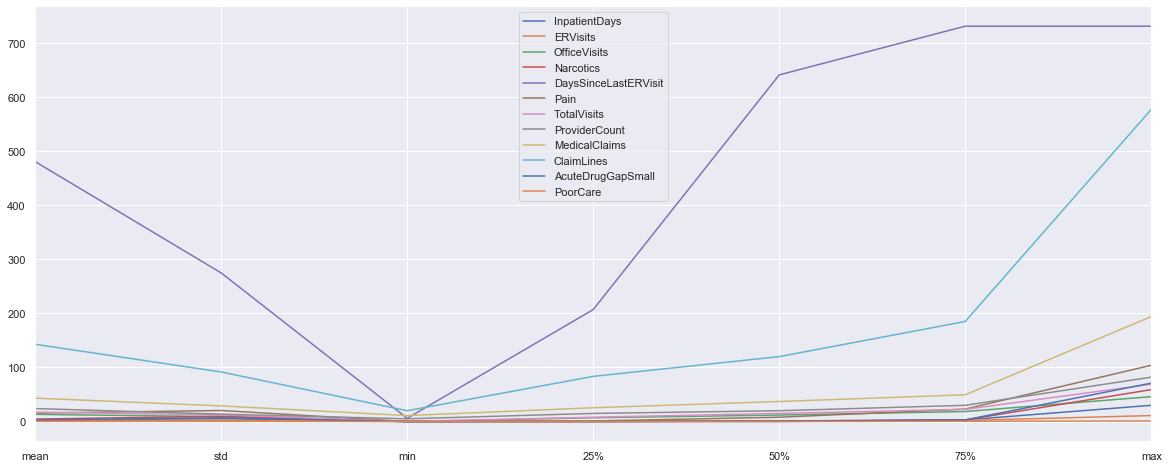

In [21]:
df.describe().drop('count',axis=0).plot(figsize=(20,8))
plt.show()

### Observations:
- Mean standard deviation and 5 point summary are very close for all variables except ClaimLines and DaysSinceLastERVisit

### Outliers analysis of numerical columns

In [110]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [113]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in df.columns.drop(['PoorCare','StartedOnCombination']) :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(df.loc[(df[col] < lower_limit) | (df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : InpatientDays
 Q1 = 0.0 
 Q3 = 3.0
 IQR = 3.0
 Lower limit = -4.5
 Upper limit = 7.5

18 OUTLIERS ARE PRESENT in InpatientDays column.
Outlier datapoints in InpatientDays column are:
[ 8 16  8 13 10 19 30 12  8 12 10  9 10  9  8 11 15 30]

Column name : ERVisits
 Q1 = 0.0 
 Q3 = 2.0
 IQR = 2.0
 Lower limit = -3.0
 Upper limit = 5.0

9 OUTLIERS ARE PRESENT in ERVisits column.
Outlier datapoints in ERVisits column are:
[ 8  8  7  6  6  7  8  7 11]

Column name : OfficeVisits
 Q1 = 7.0 
 Q3 = 18.5
 IQR = 11.5
 Lower limit = -10.25
 Upper limit = 35.75

4 OUTLIERS ARE PRESENT in OfficeVisits column.
Outlier datapoints in OfficeVisits column are:
[45 46 37 46]

Column name : Narcotics
 Q1 = 0.0 
 Q3 = 3.0
 IQR = 3.0
 Lower limit = -4.5
 Upper limit = 7.5

20 OUTLIERS ARE PRESENT in Narcotics column.
Outlier datapoints in Narcotics column are:
[32 25 34 19 30  9 46 11 10 25 59 20 11 21 40 25  8 25  9  9]

Column name : DaysSinceLastERVisit
 Q1 = 206.95833330000002 
 Q3 = 731.0

## Visualizing Outliers in dataset using boxplot


		Boxplot to check the presence of outliers in numeric columns



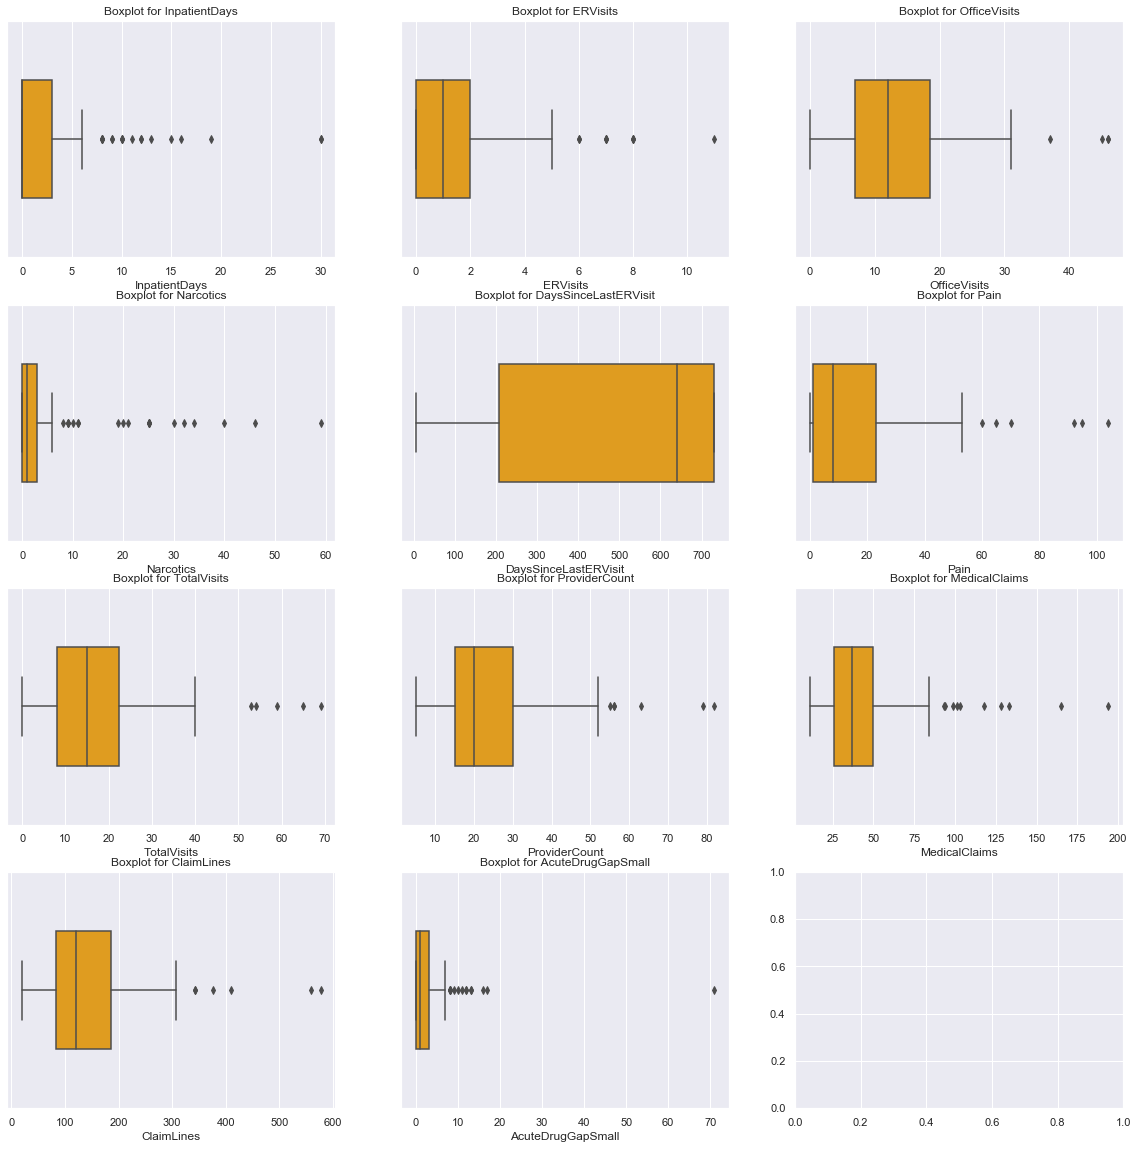

In [24]:
#Visualizing Outliers in dataset using boxplot

print('\n\t\tBoxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')
fig, ax = plt.subplots(4,3,figsize=(20, 20))
for col,subplot in zip(df.columns.drop(['PoorCare','StartedOnCombination']),ax.flatten()) :
    sns.boxplot(x=df[[col]], width=0.5, color='orange', ax=subplot)
    subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
- All the numerical columns have outliers in them
- Maximum number of Outliers (20) are present in Narcotics column
- InpatientDays and AcuteDrugGapSmall have 18 and 14 outliers respectfully
- Total visits has the least no of 4 outliers
- There are four columns where the left whisker/lower whisker is not seen as the minimum value is equal to the first quartile.These are - InpatientDays, ERVisits, Narcotics, AcuteDrugGapSmall
- There is one column, DaysSinceLastERVisit, where the right whisker/upper whisker is not seen as the maximum value is equal to the third quartile
- No whisker will be visible if the lower quartile is equal to the minimum, or if the upper quartile is equal to the maximum
- In the column pain, the minimum value is very close to first quartile

## Variance in numerical columns

In [25]:
var = df.drop(['PoorCare','StartedOnCombination'], axis=1).var()
var

InpatientDays              26.004228
ERVisits                    4.698062
OfficeVisits               82.393306
Narcotics                  94.354316
DaysSinceLastERVisit    75497.036395
Pain                      416.894774
TotalVisits               151.248620
ProviderCount             186.876688
MedicalClaims             834.432179
ClaimLines               8396.042513
AcuteDrugGapSmall          48.767587
dtype: float64

## Visualizing variance of numerical columns through lineplot

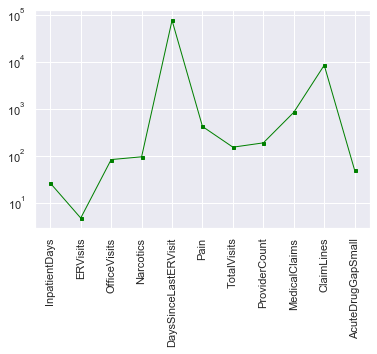

In [26]:
plt.figure()
plt.xticks(rotation = 90)
plt.yticks()
plt.plot(var, color='green', marker='s',linewidth=1, markersize=3)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
- The above line plot shows the variance values for all the numerical feature columns
- Variance in all the numerical columns vary exponentially
- Variance in ERVisits column is very less with a value of 4.7
- Variance in DaysSinceLastERVisit column is very high and is close to 10^5
- Variance in ClaimLinese column is close to 10^4 and in MedicalClaims column it is close to 10^3.
- A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
- With all variances varying exponentially, it is suggested to scale the column data using any standadization method for model building.

# Univariate Analysis

## Visualizing Distribution of numerical columns through distplots

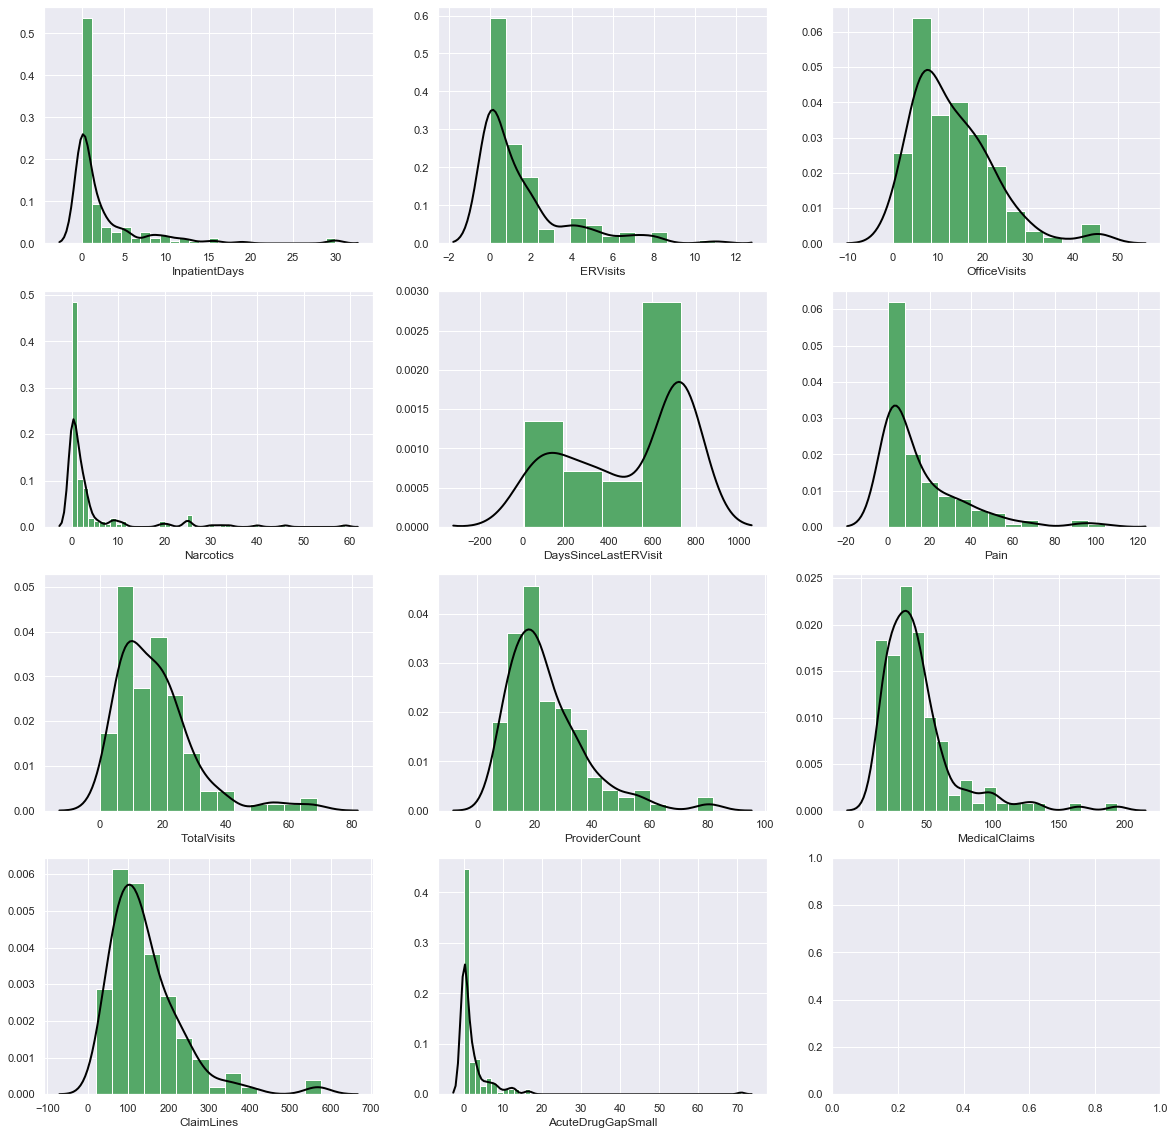

In [28]:
fig, ax = plt.subplots(4,3,figsize=(20, 20))
for col,subplot in zip( df.columns.drop(['PoorCare','StartedOnCombination']),ax.flatten()) :
    ax =sns.distplot(df[col], ax=subplot, hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})

### Observations on univariate analysis of numerical columns:
 - Distplots for all the columns show that all the columns except OfficeVisits column are extremely right skewed with long tails to the right side of the distribution.For all these columns, the mean is greater than the median

## Visualizing value counts of categorical columns through countplot

In [105]:
# Apart from PoorCare which is the Target column there is only one other categorical column, StartedOnCombination
# Value counts and distribution of StartedOnCombination column

In [29]:
df.StartedOnCombination.value_counts()

False    125
True       6
Name: StartedOnCombination, dtype: int64

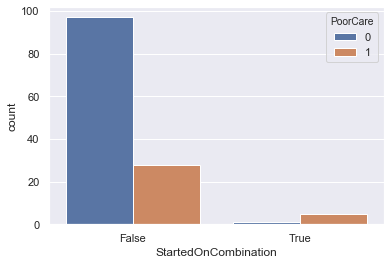

In [30]:
ax = sns.countplot(df.StartedOnCombination, hue=df.PoorCare)

### Observations on univariate analysis of categorical columns:
- Of the 131 patients only 6 patients (4.6%) were started on a combination of drugs and 125 patients (95.4%) were not given any combination of drugs during treatment

### Target column distribution

In [104]:
# The Target column is 'PoorCare'.
# Value counts and distribution of Target column

In [32]:
df.groupby(by='PoorCare').count()

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
PoorCare,,,,,,,,,,,,
0,98,98,98,98,98,98,98,98,98,98,98,98
1,33,33,33,33,33,33,33,33,33,33,33,33


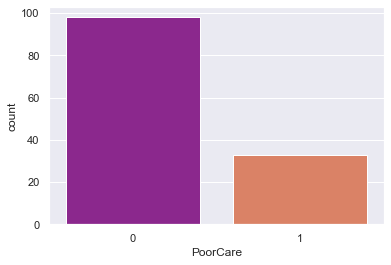

In [33]:
sns.countplot(df['PoorCare'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
1. __A status of '1' refers to a 'Patient getting PoorCare'.__
2. Among the 131 MemberId's, 33 customers (= 25%) received Bad Quality Health Care
3. __A status of '0' refers to a 'Patient getting GoodCare'.__
4. Among the 131 customers, 98 customers (= 75%) have received Good Quality Healtth Care

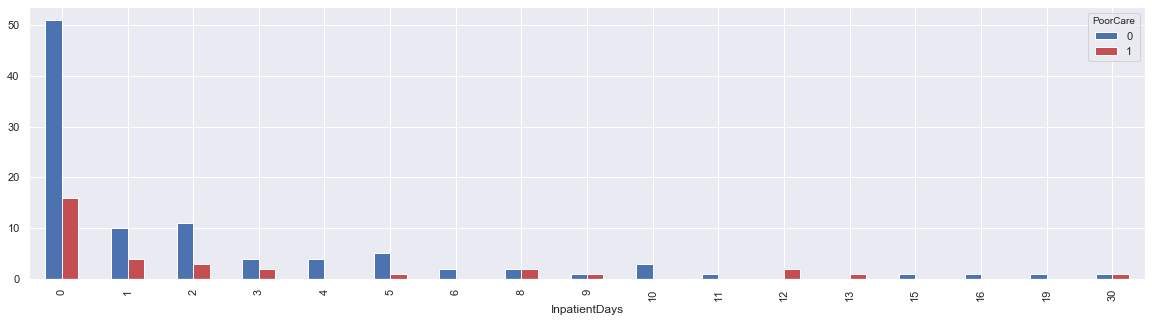

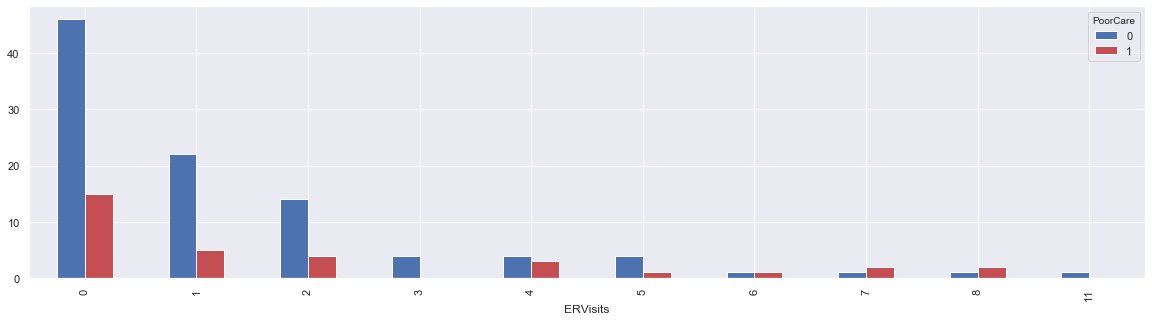

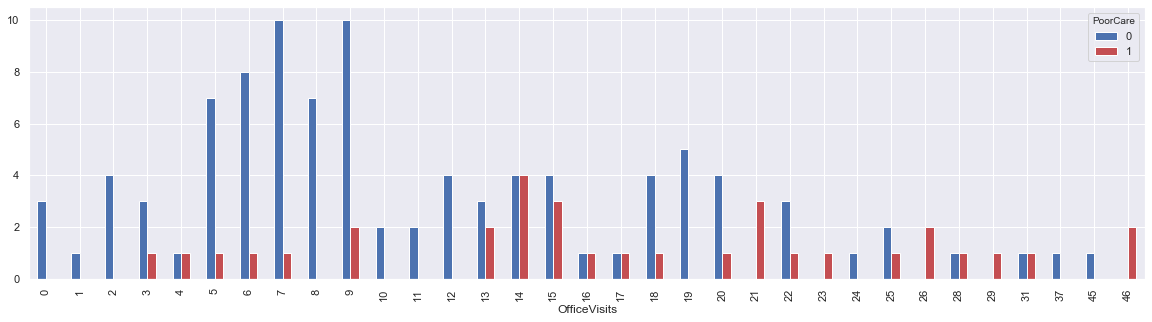

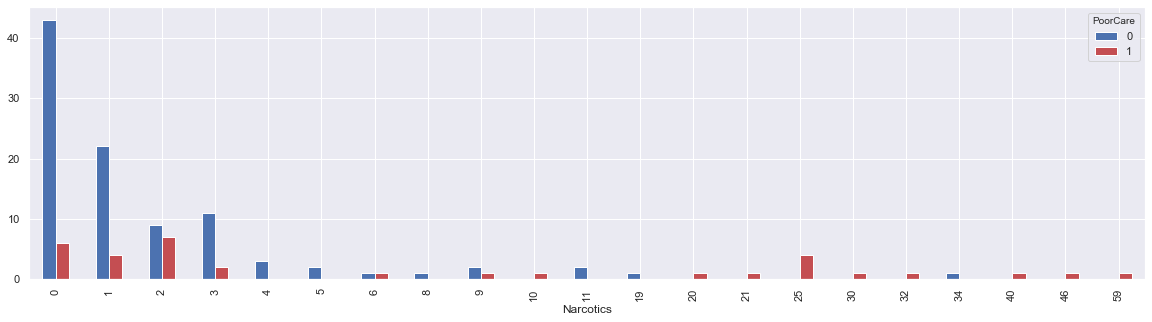

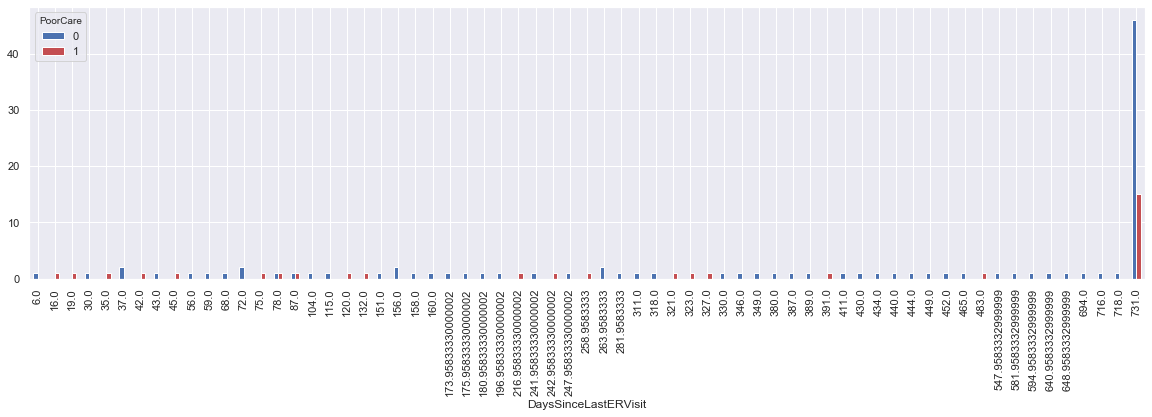

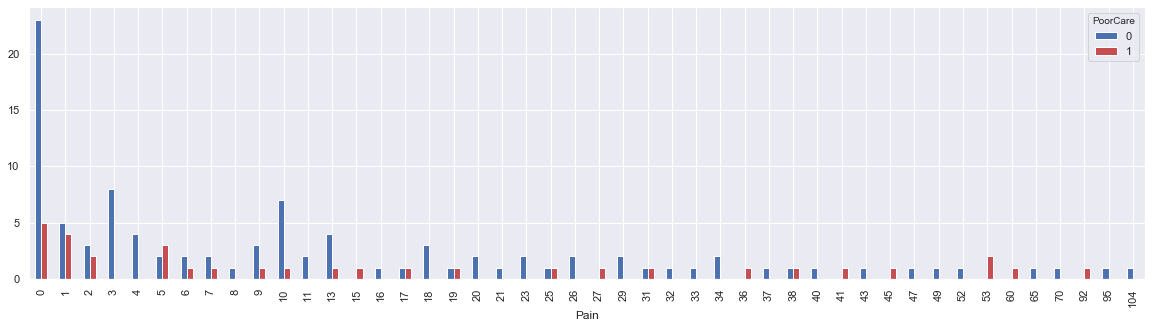

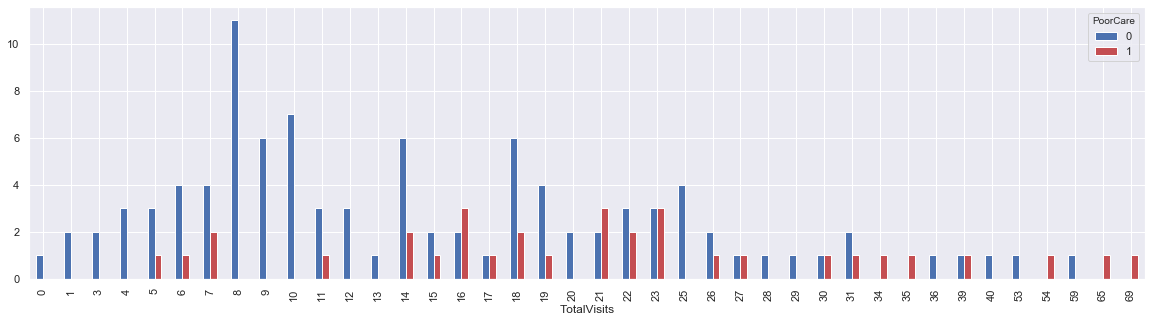

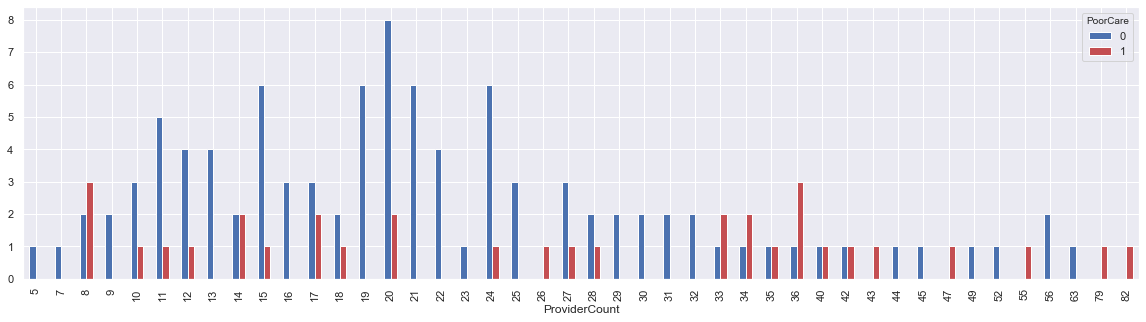

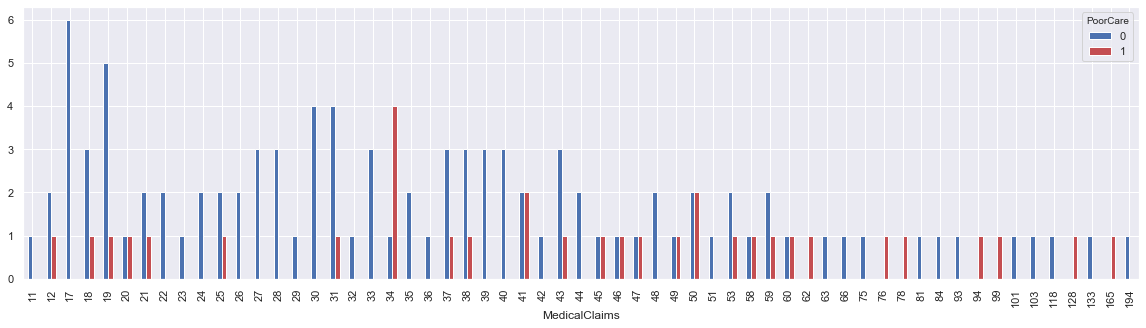

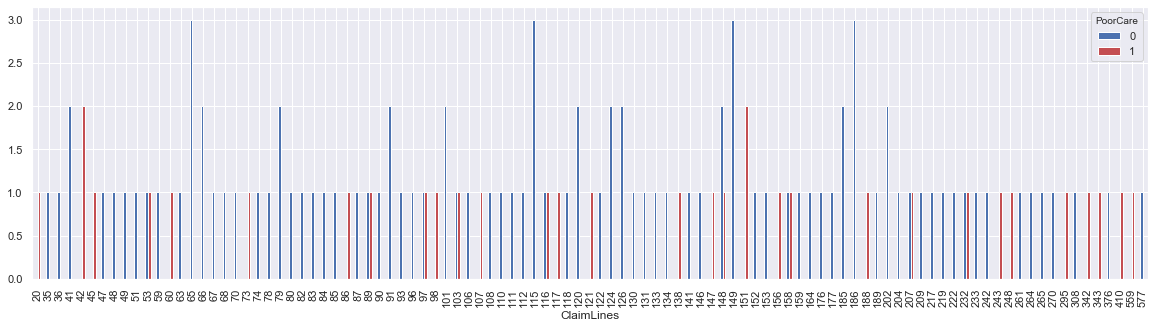

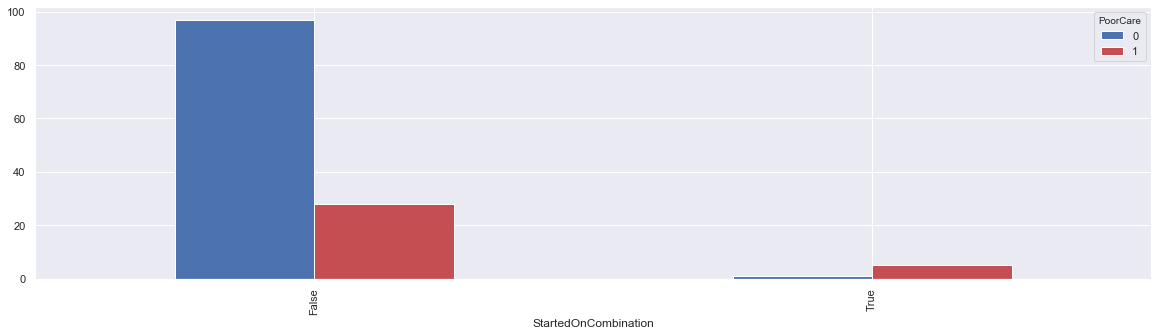

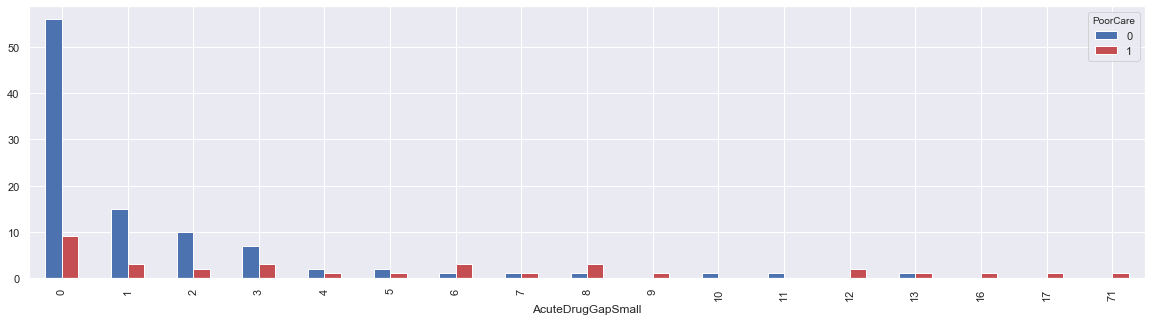

In [34]:
for col in df.drop('PoorCare', axis=1).columns :
    pd.crosstab(df[col], df['PoorCare']).plot(kind='bar',color=('b', 'r'), figsize=(20,5))

### Observations on distribution of Target column:


# Bivariate Analysis

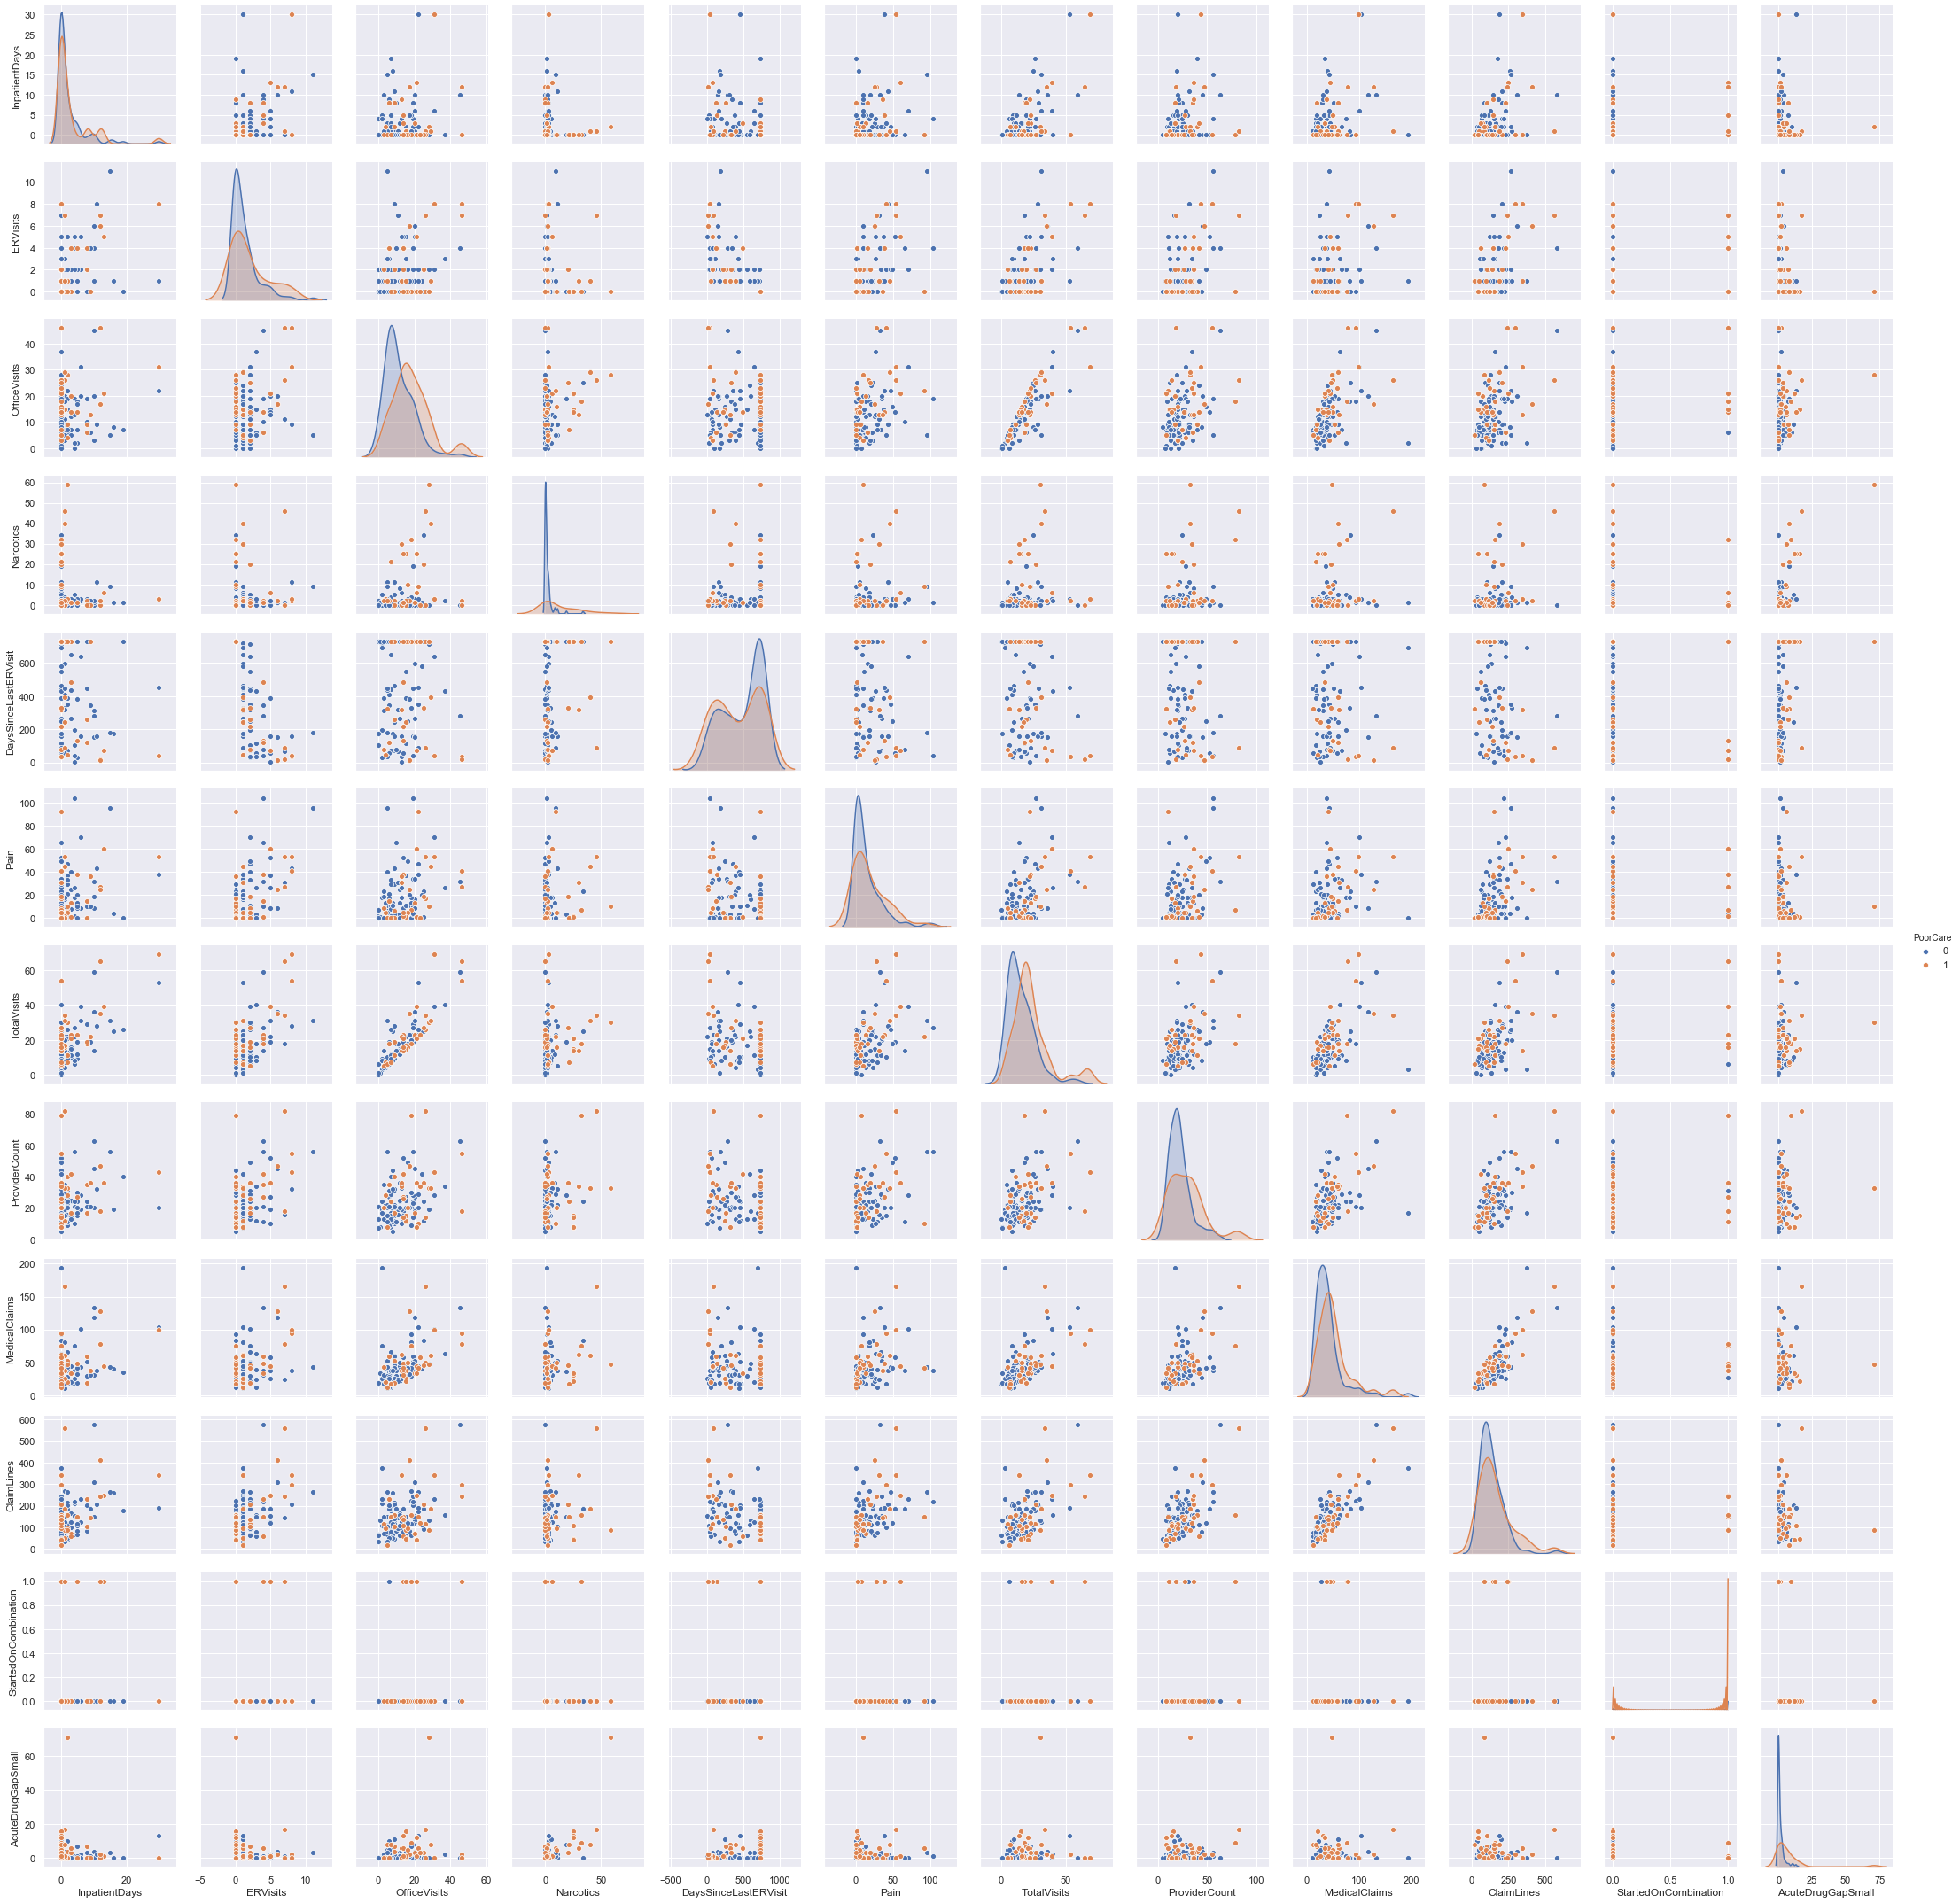

In [35]:
sns.pairplot(vars=df.drop('PoorCare', axis=1).columns,hue='PoorCare',data=df)
plt.show()

In [36]:
df.columns

Index(['InpatientDays', 'ERVisits', 'OfficeVisits', 'Narcotics',
       'DaysSinceLastERVisit', 'Pain', 'TotalVisits', 'ProviderCount',
       'MedicalClaims', 'ClaimLines', 'StartedOnCombination',
       'AcuteDrugGapSmall', 'PoorCare'],
      dtype='object')

### Observations on bivariate analysis using pairplot:
- TotalVisits and OfficeVisits show a strong linear relationship with each other.
- ProviderCount, MedicalClaims, ClaimLines and OfficeVisits show slight correlation with OfficeVisits
- Except for a slight linear relationship between Income and CCAvg no other columns show a good relationship among them.
- The KDE plots for Age and Experience are completely overlapping based on target column classes, which means target column is very difficult to classify based on these two columns.
- Also we can say two good clusters can be formed.

## Correlation between numerical columns

In [37]:
#corr = pd_df.corr()
#Dropping satus column while finding the correlatipn as it is the target variable.
corr = df.drop(['PoorCare','StartedOnCombination'], axis=1).corr()
corr.style.background_gradient(cmap='YlGnBu')

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall
InpatientDays,1,0.440087,0.175901,-0.0937689,-0.290121,0.304058,0.622036,0.244023,0.286378,0.386951,-0.00114435
ERVisits,0.440087,1,0.308526,-0.00373165,-0.735246,0.546779,0.586439,0.457429,0.355319,0.542001,-0.0727497
OfficeVisits,0.175901,0.308526,1,0.275759,-0.128388,0.352968,0.865387,0.365469,0.498513,0.424953,0.200735
Narcotics,-0.0937689,-0.00373165,0.275759,1,0.0650548,0.10686,0.163992,0.293478,0.220541,0.185799,0.710889
DaysSinceLastERVisit,-0.290121,-0.735246,-0.128388,0.0650548,1,-0.358781,-0.34464,-0.297701,-0.198114,-0.412797,0.131085
Pain,0.304058,0.546779,0.352968,0.10686,-0.358781,1,0.482959,0.405095,0.296697,0.464713,-0.0314902
TotalVisits,0.622036,0.586439,0.865387,0.163992,-0.34464,0.482959,1,0.451545,0.549308,0.569619,0.134861
ProviderCount,0.244023,0.457429,0.365469,0.293478,-0.297701,0.405095,0.451545,1,0.517002,0.605357,0.141284
MedicalClaims,0.286378,0.355319,0.498513,0.220541,-0.198114,0.296697,0.549308,0.517002,1,0.813935,0.0856369
ClaimLines,0.386951,0.542001,0.424953,0.185799,-0.412797,0.464713,0.569619,0.605357,0.813935,1,-0.0132295


## Visualizing Correlation between numerical columns through Heat map

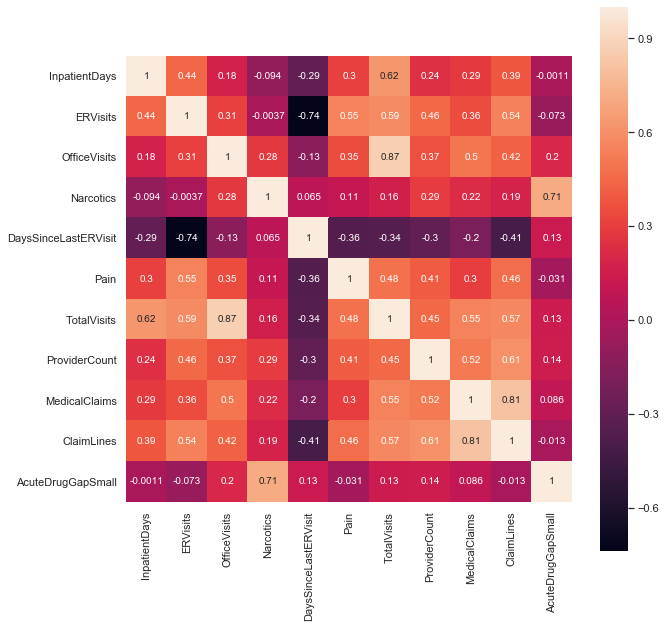

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)
plt.show()

### Observations on Correlation between numerical columns:
- TotalVisits and officeVisits columns are the fetaures which show a strong correlation of 0.87
- MedicalClaims and ClaimLines columns also show a strong correlation of 0.81
- Narcotics and AcuteDrugGapSmall have good correlation of 0.71
- Strong negative correlation 0f -0.74 is seen between the columns DaysSinceLastERVisit and ERVisits

# Implementing KNN, Logistic and Naïve Bayes Classification models

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
df['StartedOnCombination'] = le.fit_transform(df['StartedOnCombination'])

In [42]:
le.classes_

array([False,  True])

In [43]:
df['StartedOnCombination'].value_counts()

0    125
1      6
Name: StartedOnCombination, dtype: int64

### Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [44]:
X = df.drop('PoorCare',axis=1)
y = df['PoorCare']

In [45]:
print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (131, 12)
Shape of Target-set :  (131,)


### Split the data as train set and test set with a ratio of 70:30.

In [46]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [47]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (91, 12)  Target : (91,)

Test Set Shape:
Features : (40, 12)  Target : (40,)


### Standardize the training dataset and test dataset

In [53]:
#Standardization using Standard Scaler class of sklearn.preprocessing module

from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler().fit(X_train)

In [55]:
scaler.mean_

array([2.75824176e+00, 1.56043956e+00, 1.35274725e+01, 4.73626374e+00,
       4.63983516e+02, 1.57582418e+01, 1.78461538e+01, 2.35714286e+01,
       4.26703297e+01, 1.45197802e+02, 3.29670330e-02, 2.86813187e+00])

In [56]:
scaler.var_

array([2.42052892e+01, 4.66392948e+00, 9.38756189e+01, 9.96667069e+01,
       7.87865686e+04, 4.23370124e+02, 1.70547760e+02, 1.67937206e+02,
       7.13759449e+02, 9.47879604e+03, 3.18802077e-02, 6.41144789e+01])

In [57]:
#Training set transformed to fit Standard Scaler

X_trainS = scaler.transform(X_train)

In [58]:
#Test set transformed to fit Standard Scaler

X_testS = scaler.transform(X_test)

In [59]:
print(X_trainS.mean(), X_trainS.std())

-6.100126508929432e-19 1.0


In [60]:
print(X_testS.mean(), X_testS.std())

0.003493605925602735 0.9956086516094522


In [61]:
#DataFrame to store model Performance metrics of all the classification methods
compare_metrics_df = pd.DataFrame(index=('K-NearestNeighbors', 'Logistic Regression', 'Gaussian Naive Bayes'), 
                                  columns=('Trainingset Accuracy', 'Testset Accuracy', 'Precision Score', 
                                           'Recall Score', 'F1 Score', 'ROC_AUC Score'))

In [62]:
compare_metrics_df.index.name = 'Classifier Name'

## Implementing K Nearest Neighbors (KNN) Classification model

### Build KNN Classification model using train Dataset and predict the class on test dataset.

In [63]:
#Implementing KNN Classifier for default k value 5

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [64]:
#Fit the model to the training set

knn_clf.fit(X_trainS, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [65]:
# Predict classes using the built model

yhat_knn = knn_clf.predict(X_testS)

In [66]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['K-NearestNeighbors','Trainingset Accuracy'] = round(knn_clf.score(X_trainS, y_train), 2)
knn_clf.score(X_trainS, y_train)

1.0

In [67]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['K-NearestNeighbors','Testset Accuracy'] = round(knn_clf.score(X_testS, y_test), 2)
knn_clf.score(X_testS, y_test)

0.8

In [68]:
k_range = 10
mean_train_acc_knn = np.zeros(k_range)
mean_test_acc_knn = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_trainS, y_train)
    mean_train_acc_knn[n-1] = KNN.score(X_trainS, y_train)
    mean_test_acc_knn[n-1] = KNN.score(X_testS, y_test)

In [69]:
print('\nBest test accuracy is {0} for a K value of {1}'.format(mean_test_acc_knn.max(), mean_test_acc_knn.argmax()+1))
print('\nThe train accuracy for best test accuracy is {}'.format(mean_train_acc_knn[mean_test_acc_knn.argmax()+1]))
print('\nThe Best K-value for the classification is K = {}'.format(mean_test_acc_knn.argmax()+1))


Best test accuracy is 0.8 for a K value of 3

The train accuracy for best test accuracy is 1.0

The Best K-value for the classification is K = 3


#### The model accuracy score with k value of 3 is the best accuracy.So, we can proceed with calculating the metrics with k value of 3 using KNN Classifier

### Model Performance using KNN Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [70]:
confusion_matrix_knn = confusion_matrix(y_test, yhat_knn)
confusion_matrix(y_test, yhat_knn)

array([[30,  1],
       [ 7,  2]], dtype=int64)

##### accuracy-score

In [71]:
accuracy_score(y_test, yhat_knn)

0.8

##### Precision score

In [72]:
compare_metrics_df.loc['K-NearestNeighbors','Precision Score'] = round(precision_score(y_test, yhat_knn), 2)
precision_score(y_test, yhat_knn)

0.6666666666666666

###### Recall score

In [73]:
compare_metrics_df.loc['K-NearestNeighbors','Recall Score'] = round(recall_score(y_test, yhat_knn), 2)
recall_score(y_test, yhat_knn)

0.2222222222222222

###### F1-Score

In [74]:
compare_metrics_df.loc['K-NearestNeighbors','F1 Score'] = round(f1_score(y_test, yhat_knn), 2)
f1_score(y_test, yhat_knn)

0.3333333333333333

###### ROC_AUC-Score

In [75]:
compare_metrics_df.loc['K-NearestNeighbors','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_knn), 2)
roc_auc_score(y_test, yhat_knn)

0.5949820788530467

##### Classification report

In [76]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        31
           1       0.67      0.22      0.33         9

    accuracy                           0.80        40
   macro avg       0.74      0.59      0.61        40
weighted avg       0.78      0.80      0.76        40



## Implementing Logistic Regression Classification model

### Build Logistic Regression Classification Model using train Dataset and predict the class on test dataset.

In [77]:
#Implementing Logistic Regression Classifier

lgr_clf = LogisticRegression(solver='lbfgs', random_state=7)

In [78]:
#Fit the model to the training set

lgr_clf.fit(X_trainS, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# Predict classes using the built model

yhat_lgr = lgr_clf.predict(X_testS)

In [80]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Logistic Regression','Trainingset Accuracy'] = round(lgr_clf.score(X_trainS, y_train), 2)
lgr_clf.score(X_trainS, y_train)

0.8241758241758241

In [81]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Logistic Regression','Testset Accuracy'] = round(lgr_clf.score(X_testS, y_test), 2)
lgr_clf.score(X_testS, y_test)

0.825

### Model Performance using Logistic Regression Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [82]:
confusion_matrix_lgr = confusion_matrix(y_test, yhat_lgr)
confusion_matrix(y_test, yhat_lgr)

array([[28,  3],
       [ 4,  5]], dtype=int64)

##### accuracy-score

In [83]:
accuracy_score(y_test, yhat_lgr)

0.825

##### Precision score

In [84]:
compare_metrics_df.loc['Logistic Regression','Precision Score'] = round(precision_score(y_test, yhat_lgr), 2)
precision_score(y_test, yhat_lgr)

0.625

###### Recall score

In [85]:
compare_metrics_df.loc['Logistic Regression','Recall Score'] = round(recall_score(y_test, yhat_lgr), 2)
recall_score(y_test, yhat_lgr)

0.5555555555555556

###### F1-Score

In [86]:
compare_metrics_df.loc['Logistic Regression','F1 Score'] = round(f1_score(y_test, yhat_lgr), 2)
f1_score(y_test, yhat_lgr)

0.5882352941176471

###### ROC_AUC-Score

In [87]:
compare_metrics_df.loc['Logistic Regression','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_lgr), 2)
roc_auc_score(y_test, yhat_lgr)

0.7293906810035842

##### Classification report

In [88]:
print(classification_report(y_test, yhat_lgr))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        31
           1       0.62      0.56      0.59         9

    accuracy                           0.82        40
   macro avg       0.75      0.73      0.74        40
weighted avg       0.82      0.82      0.82        40



## Implementing Naïve Bayes Classification model

### Build Gaussian Naïve Bayes Classification Model using train Dataset and predict the class on test dataset.

In [89]:
#Implementing Logistic Regression Classifier

gnb_clf = GaussianNB()

In [90]:
#Fit the model to the training set

gnb_clf.fit(X_trainS, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
# Predict classes using the built model

yhat_gnb = gnb_clf.predict(X_testS)

In [92]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Gaussian Naive Bayes','Trainingset Accuracy'] = round(gnb_clf.score(X_trainS, y_train), 2)
gnb_clf.score(X_trainS, y_train)

0.7802197802197802

In [93]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Gaussian Naive Bayes','Testset Accuracy'] = round(gnb_clf.score(X_testS, y_test), 2)
gnb_clf.score(X_testS, y_test)

0.825

### Model Performance using Naive Bayes Classifier

### Calculating Model Performance Metrics.

##### confusion matrix

In [94]:
confusion_matrix_gnb = confusion_matrix(y_test, yhat_gnb)
confusion_matrix(y_test, yhat_gnb)

array([[27,  4],
       [ 3,  6]], dtype=int64)

##### accuracy-score

In [95]:
accuracy_score(y_test, yhat_gnb)

0.825

##### Precision score

In [96]:
compare_metrics_df.loc['Gaussian Naive Bayes','Precision Score'] = round(precision_score(y_test, yhat_gnb), 2)
precision_score(y_test, yhat_gnb)

0.6

###### Recall score

In [97]:
compare_metrics_df.loc['Gaussian Naive Bayes','Recall Score'] = round(recall_score(y_test, yhat_gnb), 2)
recall_score(y_test, yhat_gnb)

0.6666666666666666

###### F1-Score

In [98]:
compare_metrics_df.loc['Gaussian Naive Bayes','F1 Score'] = round(f1_score(y_test, yhat_gnb), 2)
f1_score(y_test, yhat_gnb)

0.631578947368421

###### ROC_AUC-Score

In [99]:
compare_metrics_df.loc['Gaussian Naive Bayes','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_gnb), 2)
roc_auc_score(y_test, yhat_gnb)

0.7688172043010751

##### Classification report

In [100]:
print(classification_report(y_test, yhat_gnb))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.60      0.67      0.63         9

    accuracy                           0.82        40
   macro avg       0.75      0.77      0.76        40
weighted avg       0.83      0.82      0.83        40



## Comparision of K-NN, Logistic Regression and Naïve Bayes Classification Models

In [101]:
compare_metrics_df

,Trainingset Accuracy,Testset Accuracy,Precision Score,Recall Score,F1 Score,ROC_AUC Score
Classifier Name,,,,,,
K-NearestNeighbors,1,0.8,0.67,0.22,0.33,0.59
Logistic Regression,0.82,0.82,0.62,0.56,0.59,0.73
Gaussian Naive Bayes,0.78,0.82,0.6,0.67,0.63,0.77


In [102]:
print("Confusion Matrix of all the 3 models")
print("====================================")
print("\nK-Nearest Neighbors:\n")
print(confusion_matrix_knn)
print("\nLogistic Regression:\n")
print(confusion_matrix_lgr)
print("\nGaussian Naive Bayes:\n")
print(confusion_matrix_gnb)

Confusion Matrix of all the 3 models

K-Nearest Neighbors:

[[30  1]
 [ 7  2]]

Logistic Regression:

[[28  3]
 [ 4  5]]

Gaussian Naive Bayes:

[[27  4]
 [ 3  6]]


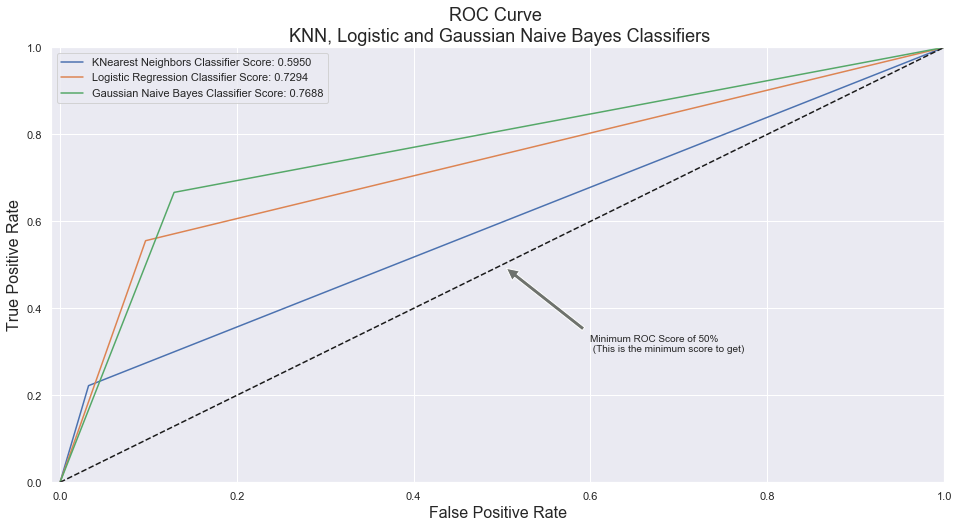

In [114]:
#ROC_AUC Curve for the three models

knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, yhat_knn)
lgr_fpr, lgr_tpr, lgr_thresold = roc_curve(y_test, yhat_lgr)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, yhat_gnb)

def graph_roc_curve(knn_fpr, knn_tpr, lgr_fpr, lgr_tpr, gnb_fpr, gnb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n KNN, Logistic and Gaussian Naive Bayes Classifiers', fontsize=18)
    plt.plot(knn_fpr, knn_tpr, label='KNearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_knn)))
    plt.plot(lgr_fpr, lgr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_lgr)))
    plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_gnb)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve(knn_fpr, knn_tpr, lgr_fpr, lgr_tpr, gnb_fpr, gnb_tpr)
plt.show()

### Interpretation of metrics from accuracy, precision, recall, roc_auc and f1 scores
- Naive Bayes classifier is giving the best accuracy with the test dataset and also agood accuracy with train dataset
- The f1 score, Precision and Recall scores with Naive Bayes are also more compared to other two models
- __So Naive Bayes Classifier is the best technique to apply on this dataset with test accuarcy of 82%__